In [1]:
%load_ext autoreload
%autoreload 2

## Data Prep 

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

In [3]:
mnist = fetch_openml('mnist_784', version=1)

X, labels = mnist.data, mnist.target
labels = labels.astype(int)

In [4]:
train_idxs = np.argwhere(labels != 9).flatten()
test_idxs = np.argwhere(labels == 9).flatten()

train_data = X[train_idxs]
test_data = X[test_idxs]

train_labels = labels[train_idxs]
test_labels = labels[test_idxs]

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((63042, 784), (6958, 784), (63042,), (6958,))

In [5]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

## Train the Model 

In [6]:
from meezer import Meezer

In [9]:
model = Meezer(embedding_dims=2,
               k=150,
               distance='pn',
               batch_size=64,
               epochs=20,
               sub_epochs=10,
               margin=1,
               ntrees=50,
               search_k=-1,
               model='szubert',
               supervision_metric='sparse_categorical_crossentropy',
               supervision_weight=0.2,
               annoy_index_path='annoy.index',
               early_stopping=True,
               verbose=True)

In [ ]:
embeddings = model.fit_transform(X=train_scaled, Y=train_labels)

Building KNN index



Extracting KNN from index



Training neural network


Mean loss: 0.18711738053771337
Building KNN index
Extracting KNN from index
Mean loss: 0.04847541790648619
Building KNN index
Extracting KNN from index
Mean loss: 0.02868124033233712
Building KNN index
Extracting KNN from index
Mean loss: 0.020554443037571972
Building KNN index
Extracting KNN from index
Mean loss: 0.016259677504274643
Building KNN index
Extracting KNN from index
Mean loss: 0.013507875256898932
Building KNN index
Extracting KNN from index
Mean loss: 0.012036196143717802
Building KNN index
Extracting KNN from index
Mean loss: 0.010520828952380837
Building KNN index
Extracting KNN from index


## Visualize Embeddings 

In [14]:
import matplotlib.pyplot as plt

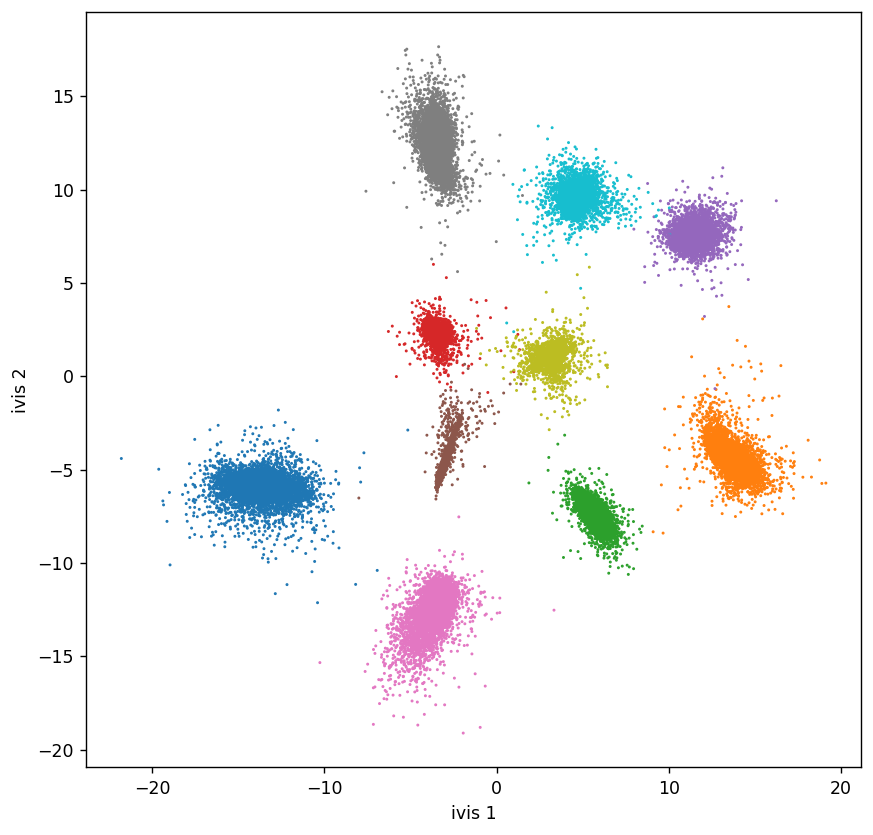

In [16]:
color = mnist.target.astype(int)

plt.figure(figsize=(8, 8), dpi=125)
plt.scatter(x=embeddings[:, 0],
            y=embeddings[:, 1], c=color, cmap='tab10', s=0.5)
plt.xlabel('ivis 1')
plt.ylabel('ivis 2')
plt.show()